In [1]:
%load_ext watermark
%load_ext autoreload

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import pickle
import os
from pathlib import Path
from pandas import option_context
sys.path.append('../../../../')
from settings import DATA_DIR, PROJECT_DIR,  RESULT_DIR

CURRENT_PATH = os.path.abspath(os.path.join(os.pardir))
print(CURRENT_PATH)
print(DATA_DIR)
print(RESULT_DIR)

e:\Studia\VI\si\recommendation_systems
E:/Studia/VI/si/data
e:\Studia\VI\si\recommendation_systems\results


In [3]:
import logging

logging.basicConfig(level=logging.INFO)

In [1]:
from data_processing.visualization.plot_utils import plot_counts, plot_violin, plot_line, plot_distribution

from data_processing.process.funk_svd_results_process import build_spearman_drop_frame
                                                   
from models.collaborative_filtering.knn import KNNModel
   
from data_processing.process.ratings_df_utils import (prepare_user_unrated_movies_table, prepare_user_predict_rated_movies,
                                                      prepare_user_rated_genres, merge_user_rating_with_movies, prepare_user_rated_movies_table)

from data_processing.dataframe_utils import (start_pipeline, drop_unnecessary_cols, expand_column, unpivot_dataframe,
                                                remove_nan, rename_cols, reset_index)

In [12]:
MERGED_DATA_PATH = Path(DATA_DIR) / 'processed' / 'merged_ml25m_kaggle'
MERGED_DATA_PATH

WindowsPath('E:/Studia/VI/si/data/processed/merged_ml25m_kaggle')

In [33]:
movies = pd.read_csv(os.path.join(MERGED_DATA_PATH, 'movies_merged.csv'))
ratings = pd.read_csv(os.path.join(MERGED_DATA_PATH, 'ratings_merged.csv'), 
                      dtype={
                             'userId': np.int32,
                             'movieId': np.int32,
                             'rating': np.float32,
                             'timestamp': np.int32,
                         })

In [7]:
LOGS_DIR = Path(RESULT_DIR) / 'logs/cf'
SPEARMAN_PATH = Path(LOGS_DIR,) / '2020-06-03_22-38_KNN_spearman.pkl'
REPORTS_CB_DIR = Path(PROJECT_DIR) / 'reports/figures/cf'
Path(REPORTS_CB_DIR).mkdir(parents=True, exist_ok=True)
REPORTS_CB_DIR

WindowsPath('e:/Studia/VI/si/recommendation_systems/reports/figures/cf')

In [8]:
with open(SPEARMAN_PATH, 'rb') as f:
    results = pickle.load(f)

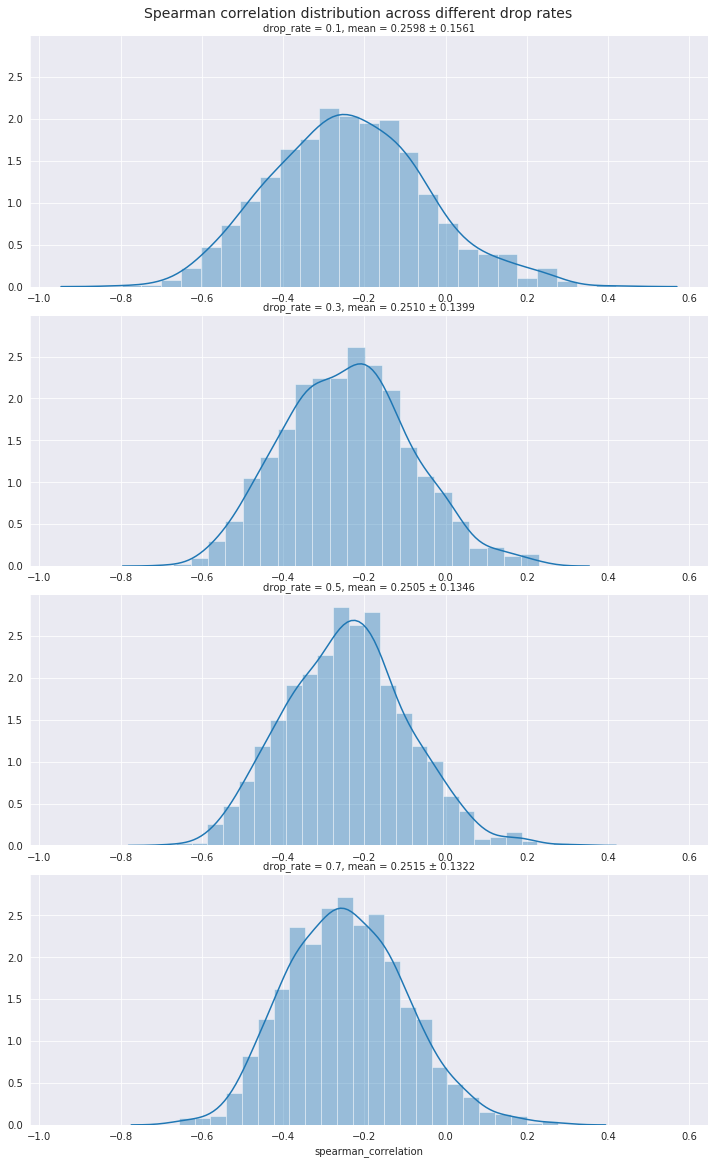

In [9]:
spearman_df_1 = build_spearman_drop_frame(results, drop_rate=0.1)
spearman_df_3 = build_spearman_drop_frame(results, drop_rate=0.3)
spearman_df_5 = build_spearman_drop_frame(results, drop_rate=0.5)
spearman_df_7 = build_spearman_drop_frame(results, drop_rate=0.7)

spearman_df = pd.concat([spearman_df_1, spearman_df_3, spearman_df_5, spearman_df_7])
spearman_df.head()

with sns.axes_style("darkgrid"):
    g = sns.FacetGrid(spearman_df, row="drop_rate", height=4, aspect=2.5)
    g.map(sns.distplot, "spearman_correlation")
    g.fig.suptitle(f'Spearman correlation distribution across different drop rates', y=1.005, 
                    fontsize=14.0)
    for ax in g.axes.flatten():
        ax.tick_params(labelbottom=True)

fig = g.fig
fig.savefig(Path(REPORTS_CB_DIR) / f'spearman_dist_plots_knn.png', bbox_inches = "tight")